# ZAD 1

1. Jakie wartości przyjmuje sepal length? Zrób wykres (typu scatter plot): na osi X numer
próbki danych, na osi Y wartość sepal length. Czy jest sens łączyć kropki na tym wykresie?

Text(0, 0.5, 'sepal length')

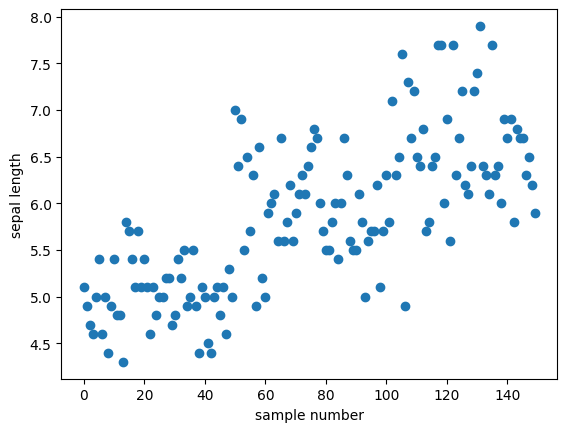

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

path = "iris.data"
cols = ["sepal_len", "sepal_wid", "petal_len", "petal_wid", "class"]
df = pd.read_csv(path, header=None, names=cols)

vals = df["sepal_len"].to_numpy()

plt.plot(range(len(vals)), vals, "o")
plt.xlabel("sample number")
plt.ylabel("sepal length")

2. Sprawdź ile jest próbek danych klasy iris setosa, dla których sepal width jest mniejszy niż
2.5. A między 2.5 i 3.0? A między 3.0 i 3.5? Itd. Zrób odpowiedni wykres (typu słupkowego).
Czy zrobiłeś histogram?

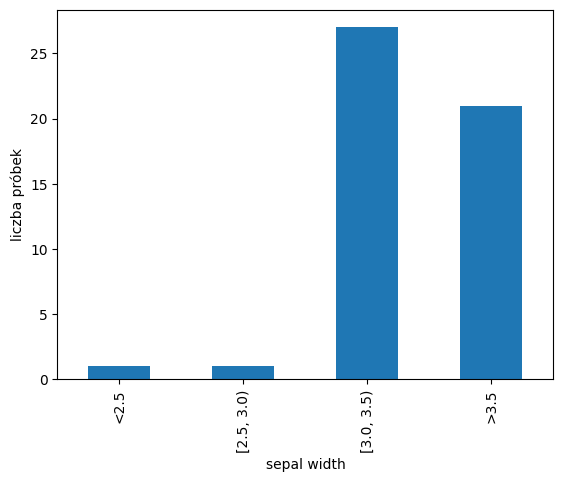

In [2]:
sep_vals = df[df['class']=='Iris-setosa']['sepal_wid']
plt.figure()
bins = [0, 2.5, 3.0, 3.5, 5]

counts = pd.cut(sep_vals, bins=bins, right=False, include_lowest=True).value_counts(sort=False)

counts.index = ['<2.5', '[2.5, 3.0)', '[3.0, 3.5)', '>3.5'] 
counts.plot(kind='bar')
plt.xlabel('sepal width')
plt.ylabel('liczba próbek')
plt.show()

3. Zrób wykres (typu scatter plot): na osi X sepal length, na osi Y sepal width. Czy jest
sens łączyć kropki na tym wykresie? Pokoloruj kropki trzema różnymi kolorami w zależności
od gatunku irysa. Ustaw rozmiar kropek proporcjonalnie do petal length (skalę rozmiarów
dobierz tak, aby rysunek był czytelny). Co ciekawego widać na tym wykresie? Czy potrafisz
wykorzystać wykres, żeby podać regułę odróżniania iris setosa od pozostałych dwóch gatunków
irysa?

Text(0, 0.5, 'sepal width')

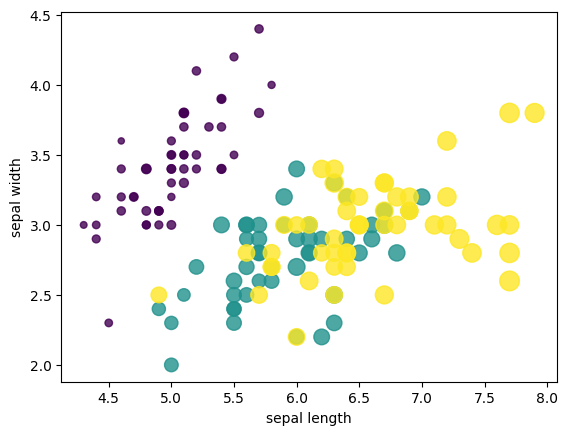

In [3]:
sep_len = df["sepal_len"]
sep_wid = df["sepal_wid"]
pet_len = df["petal_len"]

class_num = df["class"].map({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2})
size = 20 + 180 * (pet_len - pet_len.min()) / (pet_len.max() - pet_len.min())

plt.scatter(sep_len, sep_wid, c=class_num, s=size, alpha=0.8)
plt.xlabel("sepal length")
plt.ylabel("sepal width")

4. Zrób wykres z poprzedniego punktu dla każdej pary różnych atrybutów danych. Przemyśl, czy
nie będzie wygodnie ustawić wykresy w jakiś sposób obok siebie, a nie jeden pod drugim.

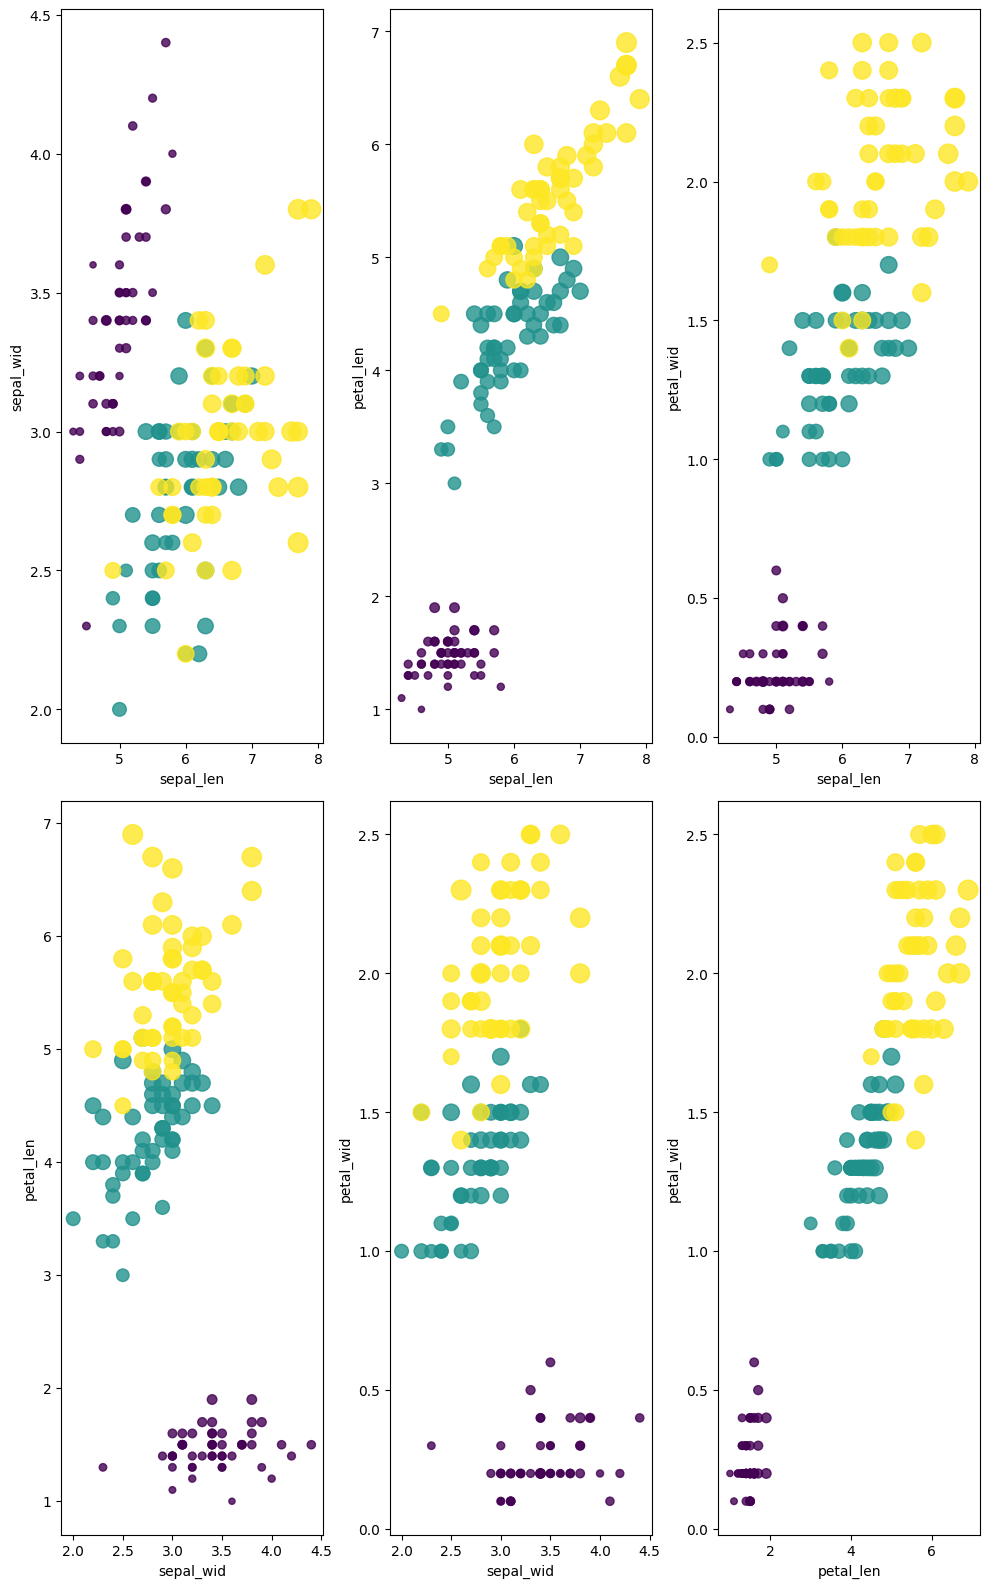

In [4]:
pairs = [
    ("sepal_len", "sepal_wid"),
    ("sepal_len", "petal_len"),
    ("sepal_len", "petal_wid"),
    ("sepal_wid", "petal_len"),
    ("sepal_wid", "petal_wid"),
    ("petal_len", "petal_wid"),
]

fig, axes = plt.subplots(2,3, figsize=(10,16))
axes=axes.ravel()

for ax, (x,y) in zip(axes, pairs):
    ax.scatter(df[x], df[y], c=class_num, s=size, alpha=0.8) 
    ax.set_xlabel(x)
    ax.set_ylabel(y)

plt.tight_layout()
plt.show()

5. Dowiedz się czym jest wykres skrzypcowy (ang. violin plot) i zrób go dla atrybutów danych.

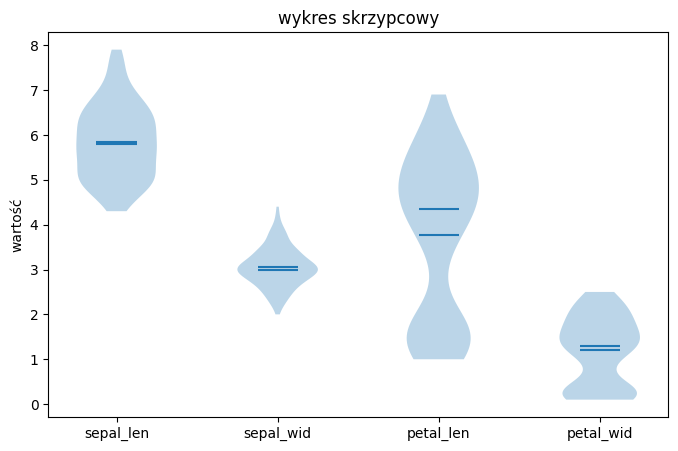

In [5]:
import matplotlib.pyplot as plt
cols = ["sepal_len", "sepal_wid", "petal_len", "petal_wid"]
data = [df[c].values for c in cols]

plt.figure(figsize=(8, 5))
parts = plt.violinplot(data, showmeans=True, showmedians=True, showextrema=False)
plt.xticks(range(1, len(cols)+1), cols)
plt.ylabel("wartość")
plt.title("wykres skrzypcowy")
plt.show()